C:\Users\cesar\AppData\Local\Temp\ipykernel_34820\1872439002.py:210: RuntimeWarning: overflow encountered in double_scalars
  u1=(Y11*ae1 + Y12*ae2 + Y13*ae3 + Y14*ae4 + Y15*ae5 + Y16*ae6 + Y17*ae7)-Kd*s1
C:\Users\cesar\AppData\Local\Temp\ipykernel_34820\1872439002.py:211: RuntimeWarning: overflow encountered in double_scalars
  u2=(Y21*ae1 + Y22*ae2 + Y23*ae3 + Y24*ae4 + Y25*ae5 + Y26*ae6 + Y27*ae7)-Kd*s2
C:\Users\cesar\AppData\Local\Temp\ipykernel_34820\1872439002.py:180: RuntimeWarning: overflow encountered in double_scalars
  Y12=np.cos(qe2)*(2*ddqr1+ddqr2)-np.sin(qe2)*(2*dqr1*dqr2+dqr2**2)
C:\Users\cesar\AppData\Local\Temp\ipykernel_34820\1872439002.py:187: RuntimeWarning: overflow encountered in double_scalars
  Y22=np.cos(qe2)*ddqr1+np.sin(qe2)*dqr1**2
C:\Users\cesar\AppData\Local\Temp\ipykernel_34820\1872439002.py:201: RuntimeWarning: overflow encountered in double_scalars
  ae1=ae1 - T*Gamma*(Y11*s1+Y21*s2)
C:\Users\cesar\AppData\Local\Temp\ipykernel_34820\1872439002.py:202: R

Tiempo de ejecución:  0.27547264099121094  segundos
Plots:



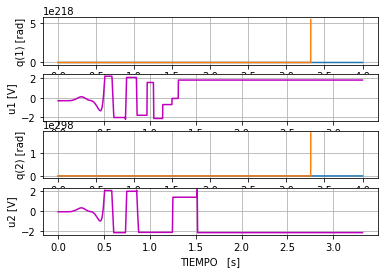

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
import time
# CONTROL ADAPTATIVO PARA ROBOT DE 2GDL
# FUNCION DE CONTROL ADAPTATIVO QUE DEVUELVE LAS SENALES DE LAS 2
# ARTICULACIONES, SENALES DE CONTROL Y POSICION
# LAS ENTRADAS SON LOS PARAMETROS DE SINTONIZACION
# Lambda=5; ld = 80; Kd = 20; Gamma = 0.01;#tap=1;
Lambda=0.5
ld = 8
Kd = 1
Gamma = 0.008
#tap=1;
u_lim=2.2
# PARAMETROS DE CONTROL
# I = [1 0 0 0;0 1 0 0;0 0 1 0;0 0 0 1];
I = np.eye(2,2)
Ld = ld*I
# DATOS DEL SUB-SISTEMA MECANICO
# Masas
m3=0.135
m4=0.236
#Longitudes
l3_y=0.0933
L3_y=0.124
l4_y=0.060
L4_y=0.126
# Inercias
Ixx3=1358961*1e-09
Iyy3=1350228*1e-09
Izz3=24835*1e-09
Ixx4=1128335*1e-09
Iyy4=1077791*1e-09
Izz4=182774*1e-09
Bm=0.0001
Bg=0.01
#   n=353.5; g=9.81;
n=350.5
g=9.81
Jm=0.0000071
Jg=0.0000053
#   Jeq=(n**2)*Jm+Jg;Beq=(n**2)*Bm+Bg;
Jeq=0.0037
Beq=0.0012

# DATOS DEL SUB-SISTEMA ELECTRICO
#   Km=0.0458; Kb=0.0458; KA=8.5; Ra=2.49;Ka=8.5;
Km=0.005
Kb=1
KA=1
Ra=1
Ka=1

# Keq=Beq+(n**2)*Km*Kb/Ra;

# CONDICIONES INICIALES
# VALORES INICIALES
q1 = np.deg2rad(0)
q2 = np.deg2rad(0)
dq1 = 0
dq2 = 0
qe1 = np.deg2rad(0)
qe2 = np.deg2rad(0)
dqe1 = 0
dqe2 = 0
dqd1 = 0
dqd2 = 0
ddqd1 =  0
ddqd2 =  0
qd1 = 0
qd2 = 0
qtilde1 = 0
qtilde2 = 0
dqr1 = np.deg2rad(0)
dqr2 = np.deg2rad(0)
ddqr1 =  0
ddqr2 =  0
s1 =  0
s2 =  0
dqtilde1 = 0
dqtilde2 = 0
# print("dqe:\n")
# print(dqe)
# print("\n")
U_lin=1/(Km*n)
a1=m3*l3_y**2+Iyy3+Iyy4+m4*(L3_y**2+l4_y**2)
a2=m4*L3_y*l4_y
a3=Jeq
a4=Beq
a5=Iyy4+m4*l4_y**2
a6=m4*L3_y+m3*l3_y
a7=m4*l4_y
ae1=U_lin*a1
ae2=U_lin*a2
ae3=U_lin*a3
ae4=U_lin*a4
ae5=U_lin*a5
ae6=U_lin*a6
ae7=U_lin*a7
u_pas1=0
u_pas2=0

# LAZO DE CONTROL
T = 0.001
Tp = 5
A = 0.5
W = 2*np.pi*T/Tp   
nn = 4000

Q1=np.zeros((1,nn), dtype=np.float64)
Qd1=np.zeros((1,nn), dtype=np.float64)
U1=np.zeros((1,nn), dtype=np.float64)
Q2=np.zeros((1,nn), dtype=np.float64)
Qd2=np.zeros((1,nn), dtype=np.float64)
U2=np.zeros((1,nn), dtype=np.float64)
Q=np.zeros((2,nn), dtype=np.float64)
# print("dqe:\n")
# print(dqe)
# print("\n")

start_time = time.time()
# LAZO DE CONTROL
for k in np.arange(0, nn):

    # REFERENCIAS DESEADAS
#     qd_temp = np.copy(qd)
    if k >= 0 and k <= nn/4:
        qd1 = 0*A
        qd2 = 0*A
    elif k >= nn/4 and k <= nn/2:
        qd1 = 0.2*A
        qd2 = 0.7*A
    elif k >= nn/2 and k <= 3*nn/4:
        qd1 = 0.8*A
        qd2 = 0.3*A
    elif k >= 3*nn/4 and k <= nn:
        qd1 = 0.3*A
        qd2 = 0.5*A
#     np.copyto(qd, qd_temp)


    Qd1_temp = np.copy(Qd1)
    Qd2_temp = np.copy(Qd2)
    Qd1_temp[0,k]=qd1
    Qd2_temp[0,k]=qd2
    np.copyto(Qd1,Qd1_temp)
    np.copyto(Qd2,Qd2_temp)

    dqd1=0
    dqd2=0
    ddqd1=0
    ddqd2=0

    # OBSERVADOR DE VELOCIDAD
    dqe1 = dqd1 + ld*(q1 - qe1)
    dqe2 = dqd2 + ld*(q2 - qe2)
    qe1 = qe1 + T*dqe1
    qe2 = qe2 + T*dqe2
    
    # ERROR DE POSICION Y DE VELOCIDAD   
    qtilde1 = q1 - qd1
    qtilde2 = q2 - qd2
    dqtilde1 = dqe1 - dqd1
    dqtilde2 = dqe2 - dqd2

    # FUNCION DE DESLIZAMIENTO 
    s1 = dqtilde1 + Lambda*qtilde1
    s2 = dqtilde1 + Lambda*qtilde1

    # VELOCIDAD Y ACELERACION DE REFERENCIA
    dqr1 = dqd1 - Lambda*qtilde1
    dqr2 = dqd2 - Lambda*qtilde2
    ddqr1 = ddqd1 - Lambda*dqtilde1
    ddqr2 = ddqd2 - Lambda*dqtilde2

    # MATRIZ Y
    Y11=ddqr1

    Y12=np.cos(qe2)*(2*ddqr1+ddqr2)-np.sin(qe2)*(2*dqr1*dqr2+dqr2**2)
    Y13=ddqr1
    Y14=dqr1
    Y15=ddqr2
    Y16=-g*np.cos(qe1)
    Y17=-g*np.cos(qe1+qe2)
    Y21=0
    Y22=np.cos(qe2)*ddqr1+np.sin(qe2)*dqr1**2
    Y23=ddqr2
    Y24=dqr2
    Y25=ddqr1+ddqr2
    Y26=0
    Y27=-g*np.cos(qe1+qe2)

    Y = np.array([[Y11, Y12, Y13, Y14, Y15, Y16, Y17],
                [Y21, Y22, Y23, Y24, Y25, Y26, Y27]])


    # ESTIMACION DE PARAMETROS
    Y_trans = np.transpose(Y) 
    
    ae1=ae1 - T*Gamma*(Y11*s1+Y21*s2)
    ae2=ae2 - T*Gamma*(Y12*s1+Y22*s2)
    ae3=ae3 - T*Gamma*(Y13*s1+Y23*s2)
    ae4=ae4 - T*Gamma*(Y14*s1+Y24*s2)
    ae5=ae5 - T*Gamma*(Y15*s1+Y25*s2)
    ae6=ae6 - T*Gamma*(Y16*s1+Y26*s2)
    ae7=ae7 - T*Gamma*(Y17*s1+Y27*s2)

    # LEY DE CONTROL 
    u1=(Y11*ae1 + Y12*ae2 + Y13*ae3 + Y14*ae4 + Y15*ae5 + Y16*ae6 + Y17*ae7)-Kd*s1
    u2=(Y21*ae1 + Y22*ae2 + Y23*ae3 + Y24*ae4 + Y25*ae5 + Y26*ae6 + Y27*ae7)-Kd*s2

    # Limitador de corriente:
    if u1 > u_lim or u1 < -u_lim:
        u1 = u_pas1
 
    else:
        u_pas1 = u1

    if u2 > u_lim or u2 < -u_lim:
        u2 = u_pas2
    else:
        u_pas2 = u2
    #Almacenar variables de control:

    U1_temp = np.copy(U1)
    U2_temp = np.copy(U2)
    U1_temp[0,k]=u1
    U2_temp[0,k]=u2
    np.copyto(U1,U1_temp)
    np.copyto(U2,U2_temp)


    # MODELO DINAMICO DEL SISTEMA 
    M11 = U_lin*(Iyy3 + Iyy4 + Jeq + m4*(L3_y**2 + 2*np.cos(q2)*L3_y*l4_y + l4_y**2) + l3_y**2*m3);
    M12 = U_lin*(Iyy4 + m4*(l4_y**2 + L3_y*np.cos(q2)*l4_y));
    M21 = M12;
    M22 = U_lin*(m4*l4_y**2 + Iyy4 + Jeq);
    M   = np.array([[M11, M12],
                  [M21, M22]]);
    #######
    P11 = U_lin*(Beq - L3_y*l4_y*m4*dq2*np.sin(q2));
    P12 = U_lin*(-L3_y*l4_y*m4*np.sin(q2)*(dq1 + dq2));
    P21 = U_lin*(L3_y*l4_y*m4*dq1*np.sin(q2));
    P22 = U_lin*(Beq);

    P   = np.array([[P11, P12],
              [P21, P22]])

    #####
    D11 = U_lin*(-g*m4*(l4_y*np.cos(q1 + q2) + L3_y*np.cos(q1)) - g*l3_y*m3*np.cos(q1));
    D21 = U_lin*(-g*l4_y*m4*np.cos(q1 + q2));
    d = np.array([[D11], [D21]])
    dq1_p=dq1
    dq1 = dq1 + T * M11**(-1)*(u1-P11*dq1 - P12*dq2 - D11 - M12*dq2)
    dq2 = dq2 + T * M22**(-1)*(u1-P21*dq1 - P22*dq2 - D21 - M21*dq1_p)
    q1 = q1 + T * dq1
    q2 = q2 + T * dq2
    Q1_temp = np.copy(Q1)
    Q2_temp = np.copy(Q2)
    Q1_temp[0,k]=q1
    Q2_temp[0,k]=q2
    np.copyto(Q1,Q1_temp)
    np.copyto(Q2,Q2_temp)



end_time = time.time()
execution_time = end_time - start_time
print("Tiempo de ejecución: ", execution_time, " segundos")
# GRAFICOS
# Graficar Q(1) y Qd1
Qd1p=np.transpose(Qd1)
Q1p=np.transpose(Q1)
Qd2p=np.transpose(Qd2)
Q2p=np.transpose(Q2)
U1p=np.transpose(U1)
U2p=np.transpose(U2)
ejex = np.linspace(0, nn*T, nn)
print("Plots:\n")

plt.subplot(411)
plt.plot(ejex, Qd1p, ejex, Q1p)
plt.grid(True)
plt.ylabel('q(1) [rad]')

# Graficar U1
plt.subplot(412)
plt.plot(ejex, U1p ,'m')
plt.grid(True)
plt.xlabel('TIEMPO   [s]')
plt.ylabel('u1 [V]')

# Graficar Q(2) y Qd2
plt.subplot(413)
plt.plot(ejex, Qd2p, ejex, Q2p)
plt.grid(True)
plt.xlabel('TIEMPO   [s]')
plt.ylabel('q(2) [rad]')

# Graficar U2
plt.subplot(414)
plt.plot(ejex, U2p, 'm')
plt.grid(True)
plt.xlabel('TIEMPO   [s]')
plt.ylabel('u2 [V]')

plt.show()

In [ ]:
# #np.nanmin(U1)
# Qd1p=np.transpose(Qd1)
# Qd1p.shape
